In [1]:
import sympy as sp
sp.init_printing()

In [14]:
num_of_points = 3

In [46]:
x = sp.symbols('x')
x_ = sp.symbols('x0:'+str(num_of_points))
y_ = sp.symbols('y0:'+str(num_of_points))
a_ = sp.symbols('a0:'+str(num_of_points))

### Lagrange

In [4]:
terms = []
for i in range(num_of_points):
    t_numerator = 1
    t_denominator = 1
    for j in range(num_of_points):
        if j == i:
            continue
        t_numerator *= x-x_[j]
        t_denominator *= x_[i]-x_[j]
    terms.append(t_numerator/t_denominator * y_[i])

In [5]:
f = 0
for i in terms:
    f += i

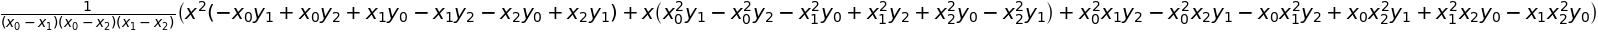

In [9]:
sp.collect(f.factor(), x)

### Linear system

In [41]:
A = sp.Matrix()
for i in range(num_of_points):
    A = A.row_insert(i, sp.Matrix([[x_[i]**j for j in range(num_of_points-1, -1, -1)]]))

In [43]:
b = sp.Matrix()
for i in range(num_of_points):
    b = b.row_insert(i, sp.Matrix([[y_[i]]]))

In [49]:
sol = sp.linsolve((A, b), [a_[i] for i in range(num_of_points-1, -1, -1)])

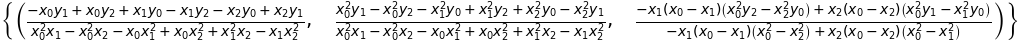

In [62]:
sol

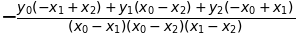

In [71]:
x2_y0_collected = sp.collect(sol.args[0][0].factor(), y_[0])
x2_y0_y1_collected = sp.collect(x2_y0_collected, y_[1])
x2_y0_y1_y2_collected = sp.collect(x2_y0_y1_collected, y_[2])
x2_y0_y1_y2_collected

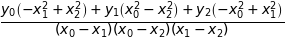

In [72]:
x1_y0_collected = sp.collect(sol.args[0][1].factor(), y_[0])
x1_y0_y1_collected = sp.collect(x1_y0_collected, y_[1])
x1_y0_y1_y2_collected = sp.collect(x1_y0_y1_collected, y_[2])
x1_y0_y1_y2_collected

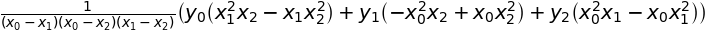

In [73]:
x0_y0_collected = sp.collect(sol.args[0][2].factor(), y_[0])
x0_y0_y1_collected = sp.collect(x0_y0_collected, y_[1])
x0_y0_y1_y2_collected = sp.collect(x0_y0_y1_collected, y_[2])
x0_y0_y1_y2_collected